### 📖Imports

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from sklearn.model_selection import train_test_split

from PIL import Image
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

### 📖Data Preparation

### 📖Function to read all images

In [2]:
def read_images (path):
    files = os.listdir(path)
    for file in files:
        if file.endswith(".png"):
            image = Image.open(os.path.join(path, file))
            image = np.array(image)
            print(image.shape)
            break
  
read_images("./Data/00_Ships")

(64, 64, 4)


In [3]:
def read_images (path):
    files = os.listdir(path)
    images = []
    
    #Prevent files that are not a png to be considered
    for file in files:
        if file.endswith(".png"):
            image = Image.open(os.path.join(path, file)) #open file
            image = np.array(image)[:,:,:1] #select first channel from image
            images.append(image)
  
    return np.array(images)

### 📖Read the images with the function above

In [4]:
ships = read_images("./Data/00_Ships")
no_ships = read_images("./Data/00_NoShips")

### 📖Check how many images were loaded

In [5]:
print(ships.shape)
print(no_ships.shape)

(1784, 64, 64, 1)
(1800, 64, 64, 1)


### 📖Plot a random image to check if everything worked so far

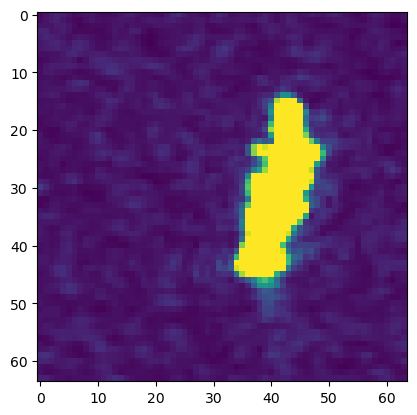

In [6]:
plt.imshow(ships[5])

### 📖Turn data into concatenated arrays to create x data (all images in one variable)

In [7]:
x = np.concatenate([ships, no_ships])
x.shape

(3584, 64, 64, 1)

### 📖Create y data (0 for no ships and 1 for ships)

In [8]:
y_ships = np.ones(len(ships))
y_no_ships = np.zeros(len(no_ships))

y = np.concatenate([y_ships, y_no_ships])
y.shape

(3584,)

### 📖Train test split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2867, 64, 64, 1)
(2867,)
(717, 64, 64, 1)
(717,)


***
### 📖Built a model

In [10]:
test = np.random.randn(1,64,64,1)
conv = Conv2D(filters = 32, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu", input_shape=(64,64,1))
conv(test).shape

TensorShape([1, 64, 64, 32])

In [11]:
test = np.random.randn(1,64,64,1)
conv = Conv2D(filters = 32, kernel_size=(9,9), strides=(2,2), padding="valid", activation="relu", input_shape=(64,64,1))
conv(test).shape

TensorShape([1, 28, 28, 32])

In [35]:
#Conv2D?
layer = Normalization(input_shape=(64,64,1))
layer.adapt(x_train)
print(layer(x_train).shape)

(2867, 64, 64, 1)


In [36]:
model = Sequential()

model.add(layer)

model.add(Conv2D(filters = 32, kernel_size=(3,3), strides=1, padding="same", activation="relu"))
model.add(MaxPooling2D())
model.add(Dropout(rate=0.2))

model.add(Conv2D(filters = 64, kernel_size=(3,3), strides=1, padding="valid", activation="relu"))
model.add(MaxPooling2D())
model.add(Dropout(rate=0.2))

model.add(Flatten())
model.add(Dense(1, activation="sigmoid"))

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer= opt, loss = "binary_crossentropy", metrics=["accuracy"])
model.summary()
history = model.fit(x_train, y_train, epochs=10, batch_size=8)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_15 (Normaliza  (None, 64, 64, 1)        3         
 tion)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 64, 64, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 30, 30, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 15, 15, 64)      

### 📖Plot the learning history

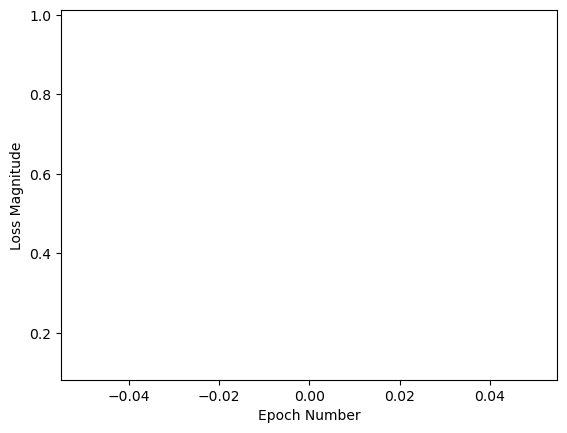

In [13]:
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])
plt.plot(history.history["accuracy"])
plt.show()

### 📖Evaluate the model

In [14]:
#Get training data accuracy
model.evaluate(x_train, y_train)

90/90 [==============================] - 1s 11ms/step - loss: 0.0564 - accuracy: 0.9930


[0.056412212550640106, 0.9930240511894226]

In [15]:
#Get testing data accuracy
model.evaluate(x_test, y_test)

23/23 [==============================] - 0s 11ms/step - loss: 0.1155 - accuracy: 0.9874


[0.11551998555660248, 0.9874476790428162]

### 📖Check some random predicted samples

Real class: 1.0
Input feature:
1/1 [==============================] - 0s 19ms/step


array([[1.]], dtype=float32)

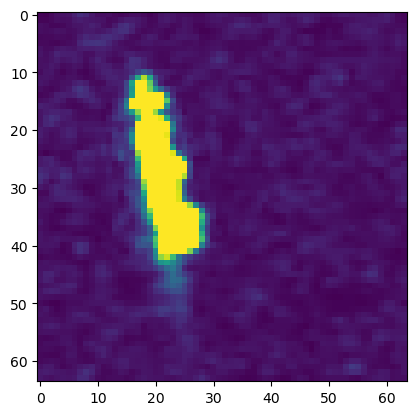

In [41]:
feature = 5 #5
print(f"Real class: {y_test[feature]}")
print("Input feature:")
plt.imshow(x_test[feature, :, :, :])
model.predict(x_test[feature, :, :,:].reshape(1,64,64,1))

### 📖Save the model

In [17]:
model.save("Ship_Detection_Modell.h5")